# Radiación de cuerpo negro

La ley de Planck describe la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico en una temperatura definida.

La ley de Planck se puede formular en términos de la frecuencia $\nu$ como:

$$B_\nu \left( \nu ,T \right) = \frac{2h\nu^3}{c^2} \frac{1}{e^{\frac{h\nu}{kT}}-1}$$

y equivalentemente, en términos de la longitud de onda $\lambda$:

$$B_\lambda \left( \lambda ,T \right) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{k\lambda T}}-1}$$


donde:

| Símbolo | Variable | Unidades SI |
|---|---|---|
| $B$ | Radiancia espectral, es la cantidad de energía por unidad de superficie, unidad de tiempo y unidad de ángulo sólido por unidad de frecuencia | W s m-2 sr-1 o W m-2 sr-1 Hz-1 |
| $\nu$ | Frecuencia | hercios (Hz) |
| $\lambda$ | Longitud de onda | metro (m) |
| $T$ | Temperatura del cuerpo negro | kelvin (K) |
| $h$ | Constante de Planck | julio x segundo (J s) |
| $c$ | Velocidad de la luz | metros / segundo (m / s) |
| $k$ | Constante de Boltzmann | julios por kelvin (J / K) |


#### Referencias:

+ [Ley de Planck](https://es.wikipedia.org/wiki/Ley_de_Planck)
+ [Plotting Planck's Law](http://gummiks.github.io/2014/01/18/planck/)
+ [Planck's law](https://en.wikipedia.org/wiki/Planck%27s_law#Black-body_radiation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.patches import Rectangle

## Modelos

In [3]:
# Constantes
h = 6.626e-34 # J·s - constante de Planck
k = 1.38e-23 # J/K - constante de Boltzmann
c = 299792458.0 # m/s - velocidad de la luz


# import scipy.constants as const
# h = const.h 
# k = const.k 
# c = const.c

### 1. Ley de Planck

In [4]:
# Ley de Planck en terminos de la frecuencia
def B_nu(nu, T):
    return ((2.0*h*np.power(nu, 3))/(np.power(c,2))) * (1.0/(np.exp(h*nu/(k*T))-1.0))

# lambda = c / nu; nu = c / lambda
# nu = c / lmbda

# Ley de Planck en terminos de la longitud de onda
def B_lambda(l, T):
    return ((2.0*h*np.power(c, 2))/(np.power(l,5))) * (1.0/(np.exp(h*c/(k*l*T))-1.0))

### 2. Ley de Rayleigh-Jeans

$$B_\lambda \left(\lambda, T\right) = \frac{2ckT}{\lambda^4}$$

#### Referencias:

+ [Ley de Rayleigh-Jeans](https://es.wikipedia.org/wiki/Ley_de_Rayleigh-Jeans)

In [5]:
## Ley de Rayleigh-Jeans en terminos de la longitud de onda
def B_rj_lambda(l, T):
    return 2.0*c*k*T/np.power(l,4)

## Visualizaciones

In [6]:
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

### A. Radiación de cuerpo negro a diferentes temperaturas

/home/phantom/.local/share/virtualenvs/EstructuraMateria-iloK9sdj/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


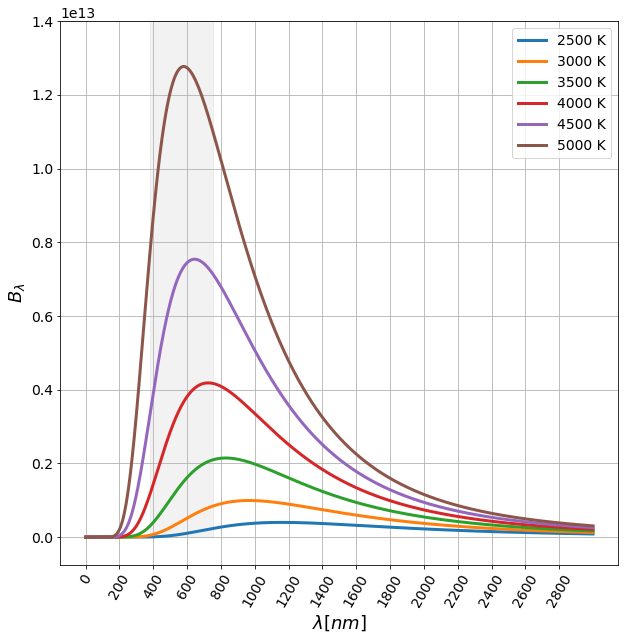

In [9]:
lmbda_max_nm = 3000
temps = [2500, 3000, 3500, 4000, 4500, 5000]
lmbda_m = np.linspace(1,lmbda_max_nm,lmbda_max_nm)*1e-9 # longitudes de onda
# nu = np.arange(3e16, 3e17, 1e14) # frecuencias
x_ticks = np.arange(0, lmbda_max_nm, 200)*1e-9
x_ticks_lbl = ["{}".format(x) for x in np.arange(0, lmbda_max_nm, 200)]


plt.gca().add_patch(Rectangle((380*1e-9, 0), 370*1e-9, 1.5e13, alpha=0.1, color='gray'))

for T in temps:
    plt.plot(lmbda_m, B_lambda(lmbda_m, T), linewidth=3, label="{} K".format(T))

base_fsize = 14
plt.rc('axes', labelsize=base_fsize+4)
plt.rc('xtick', labelsize=base_fsize)
plt.rc('ytick', labelsize=base_fsize)
plt.rc('legend', fontsize=base_fsize)
plt.xlabel('$\lambda [nm]$')
plt.ylabel('$B_\lambda$')
plt.xticks(x_ticks, x_ticks_lbl, rotation=60)
plt.ylim(top=1.4e13)
plt.grid()
plt.legend()
plt.show()

### B. Ley de Planck vs Ley de Rayleigh-Jeans

/home/phantom/.local/share/virtualenvs/EstructuraMateria-iloK9sdj/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


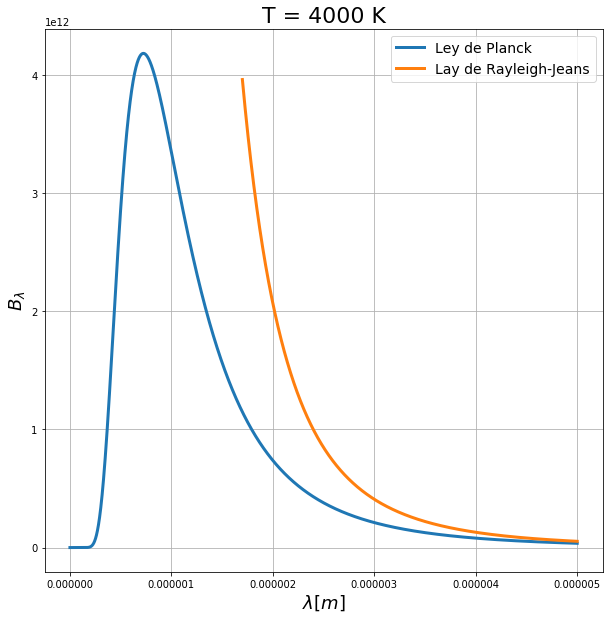

In [11]:
lmbda = np.arange(1e-9, 5e-6, 1e-9) # longitudes de onda

T = 4000
poi = 3300
plt.plot(lmbda, B_lambda(lmbda, T), linewidth=3, label="Ley de Planck")
plt.plot(lmbda[-poi:], B_rj_lambda(lmbda[-poi:], T), linewidth=3, label="Lay de Rayleigh-Jeans")

base_fsize = 14
plt.rc('axes', labelsize=base_fsize+4)
plt.rc('axes', titlesize=base_fsize+8)
plt.rc('legend', fontsize=base_fsize)
plt.xlabel('$\lambda [m]$')
plt.ylabel('$B_\lambda$')
plt.title('T = {} K'.format(T))
plt.legend()
plt.grid()
plt.show()
#plt.gca().invert_xaxis()